# Homework 2 Solutions

## Question 1, part c

Write your own Lagrange Polynomial interpolating function and interpolate the function

In [2]:
import numpy as np

def L(k, pts, x):
    '''Lagrange Polynomials; 
    k is the index of the lagrange polynomial
    pts are the locations where we have fixed values
    x is the point at which we're evaluating the polynomial
    The L_k polynomial is returned'''
    
    # initialize the product
    prod = 1.0
    
    # loop over the points, skipping i = k
    for i in range(len(pts)):
        if (i != k):
            prod = prod*(x - pts[i])/(pts[k] - pts[i])
    return prod


# 
def LagrangeInterpPoly(points, vals, x):
    '''Compute the Lagrange interpolating polynomial given
    points, the interpolating points 
    vals, the function evaluations at those points and
    x, the evaluation points of interest'''
    P = 0
    for i in range(len(points)):
        P = P + vals[i]*L(i, points, x)
    return P

In [3]:
import numpy as np

# f(x) = sin(pi/2 * x) + x^2/4
def f(x):
    
    return np.sin(np.pi/2 * x) + x**2/4.0


Now use scipy to do lagrange interpolation and compare to the real function.

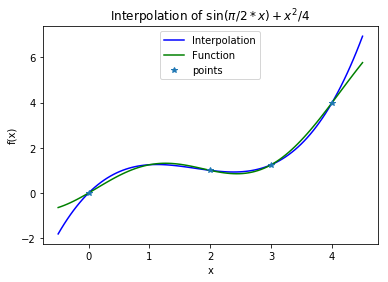

In [5]:
import scipy.interpolate as interp
%matplotlib inline
import matplotlib.pyplot as plt

# choose 4 points for interpolation
x_points = np.array([0.0, 2.0, 3.0, 4.0])

# generate equally spaced points for evaluation
x = np.linspace(-0.5, 4.5, 100)

# evaulate the function at our chosen 4 points and at our many points
f_vals = f(x_points)
F = f(x)

# Create and evaluate the interpolating polynomial at our many x locations to 
# get a smooth line
my_vals = LagrangeInterpPoly(x_points, f_vals, x)

plt.plot(x, my_vals, 'b')
plt.plot(x, F, 'g')
plt.plot(x_points, f_vals, '*')
plt.legend(("Interpolation", "Function", "points"), loc="upper center")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Interpolation of $\sin(\pi/2*x) + x^2/4$")

## Question 1, part d

Plot again with different points

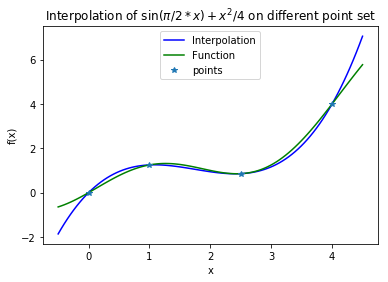

In [4]:
# choose 4 points for interpolation
x_points = np.array([0.0, 1.0, 2.5, 4.0])

# evaulate the function at our chosen 4 points and at our many points
f_vals = f(x_points)

# Create and evaluate the interpolating polynomial at our many x locations to 
# get a smooth line
my_vals = LagrangeInterpPoly(x_points, f_vals, x)

plt.plot(x, my_vals, 'b')
plt.plot(x, F, 'g')
plt.plot(x_points, f_vals, '*')
plt.legend(("Interpolation", "Function", "points"), loc="upper center")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Interpolation of $\sin(\pi/2*x) + x^2/4$ on different point set")

## Question 2

### part c arithmetic

In [5]:
x = 0.67365
s1 = (x-0)*(x-2)*(x-3)*(x-4)

x = 2.4691
s2 = (x-0)*(x-2)*(x-3)*(x-4)

x = 3.6073
s3 = (x-0)*(x-2)*(x-3)*(x-4)

print s1, s2, s3

-6.91409678855 0.941377168033 -1.38274911407


In [6]:
np.pi**4 / (16*4*2*3) * 6.91409678855

1.7538955299316947

## Question 3

Use piecewise linear, spline, and Lagrange interpolation methods for a set of data points and function evaluations.

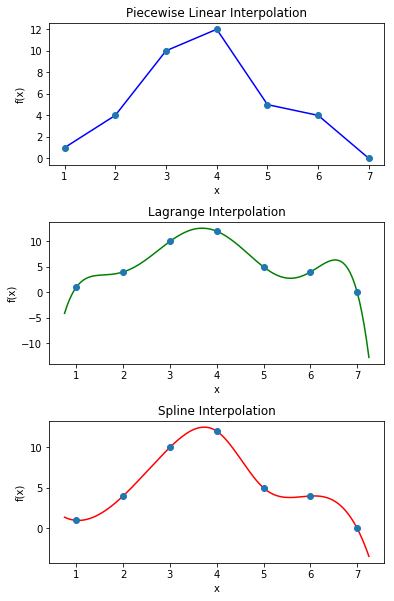

In [7]:
### %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp

# We've got 7 points where we'll look (meaning n=6)
x_vals = np.arange(1,8)

# our function evaluations (data)
f_vals = [1, 4, 10, 12, 5, 4, 0]

# and we'll evaluate our end polynomial at these many points
x_narrow = np.arange(1.0, 7.0, 0.05)
x_wide = np.arange(0.75, 7.30, 0.05)


# Get the piecewise linear interpolating polynomial
P_pLin = interp.interp1d(x_vals, f_vals, kind='linear')
# Evaluate the polynomial at our many x locations to get a smooth line
f_pLin = P_pLin(x_narrow)

# Get the Lagrange interpolating polynomial
P_Lagrange = interp.lagrange(x_vals, f_vals)
# Evaluate the polynomial at our many x locations to get a smooth line
f_Lagrange = P_Lagrange(x_wide)
    
# Get the cubic spline interpolating polynomial
P_Spline = interp.splrep(x_vals, f_vals)
# Evaluate the polynomial at our many x locations to get a smooth line
f_Spline = interp.splev(x_wide, P_Spline) 


# plot
plt.subplot(3, 1, 1)
plt.plot(x_narrow, f_pLin, 'b')
plt.plot(x_vals, f_vals, 'o')
plt.title('Piecewise Linear Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(3, 1, 2)
plt.plot(x_wide, f_Lagrange, 'g')
plt.plot(x_vals, f_vals, 'o')
plt.title('Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(3, 1, 3)
plt.plot(x_wide, f_Spline, 'r')
plt.plot(x_vals, f_vals, 'o')
plt.title('Spline Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')

# adjust the spacing
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(top=2)

## Question 4

### part c 

Enter the values, compute the matrices, and solve for k and p.

In [10]:
import numpy as np

# Our E and h values are:
h = [5.00000e-02, 2.50000e-02, 1.25000e-02, 6.25000e-03, 
     3.12500e-03, 1.56250e-03, 7.81250e-04, 3.90625e-04]

E = [1.036126e-01, 3.333834e-02, 1.375409e-02, 4.177237e-03, 
     1.103962e-03, 2.824698e-04, 7.185644e-05, 1.813937e-05]

# Next we'll need the logs of each of these:
logh = np.log(h)
logE = np.log(E)

# And finally, we'll form the normal equations directly:
A = [[8, np.sum(logh)], [np.sum(logh), np.dot(logh,logh)]]
print "A =", A, "\n"

b = [np.sum(logE), np.sum(logE * logh)]
print "b = ", b, "\n"

# now solve for x and get k and p
x = np.linalg.solve(A,b)
k = np.exp(x[0])
p = x[1]
print "k = ", k, " p = ", p

A = [[8, -43.373979244110394], [-43.373979244110394, 255.3417860181294]] 

b =  [-50.871722658012104, 311.93996796846602] 

k =  28.4327709952  p =  1.79029139399


### Part d
Use scipy curve_fit to find $k$ and $p$

In [20]:
from scipy.optimize import curve_fit
from numpy import log

# Define our approximation function
def func(x, a, b):
    return log(a) + b*log(x)

# Find a (k) and b (P)
(popt, pcov) = curve_fit(func, h, log(E))
print popt
print pcov
E_curvefit = popt[0]*h**popt[1]

[ 28.43277096   1.79029139]
[[  5.97842568e+01   3.57170039e-01]
 [  3.57170039e-01   2.31694942e-03]]


In [25]:
from scipy.optimize import curve_fit
from numpy import log

# Define our approximation function
def func(x, a, b):
    return a*x**b

# Find a (k) and b (P)
(popt, pcov) = curve_fit(func, h, E)
print popt
print pcov
E_curvefit = popt[0]*h**popt[1]

[ -2.26709633  -3.40104719  -4.28641904  -5.47810526  -6.80884975
  -8.17193892  -9.54084032 -10.91742584]
[ 11.47857787   1.57220323]
[[  1.63999698e+00   4.59919802e-02]
 [  4.59919802e-02   1.29916318e-03]]


### Part e

Plot the data (E and h) as well as the functional fit $E = kh^p$ on a loglog plot.

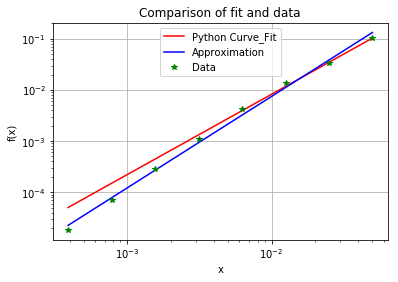

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# get an evaluation of E approximate
E_approx = k*h**p

plt.loglog(h, E_curvefit, 'r')
plt.loglog(h, E_approx, 'b')
plt.loglog(h, E, 'g*')
plt.legend(("Python Curve_Fit", "Approximation", "Data"), loc="upper center")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Comparison of fit and data")
plt.grid()

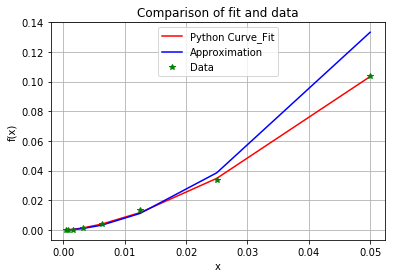

In [13]:
plt.plot(h, E_curvefit, 'r')
plt.plot(h, E_approx, 'b')
plt.plot(h, E, 'g*')
plt.legend(("Python Curve_Fit", "Approximation", "Data"), loc="upper center")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Comparison of fit and data")
plt.grid()